# Varmeligning

## 1. Varmeligning

Varmeligningen 

$$
u_t = c^2\Delta u - f
$$

kan sees på som en tidsavhengig variant av poissonligningen. Legg merke til at en eventuell likeveksttilstand med $u_t=0$ faktisk løser poissonligningen.

### Randbetingelser

Randbetingelser i rom er altså tilsvarende poissonligningen - enten med dirichlet- eller neumannbetingelser.

I tillegg trenger vi en initialbetingelse, $u(\vec{x},0)=g(\vec{x})$.

Hvis vi stiller problemet på hele $\mathbb{R}^n$ kan vi klare oss uten randbetingelser, men da er det problematisk å løse ligningen numerisk.

### Analytiske løsninger [ikke pensum]

Varmeligning kan løses analytisk for visse geometrier. For eksempel, initialverdieproblemet

$$
u_t = c^2 u_{xx} + f(x,t), \quad u(x,0)=g(x)
$$

har løsning

$$
u(x,t) = \frac{1}{\sqrt{4\pi t}} \left( 
\int_{-\infty}^{\infty} e^{\frac{-(x-y)^2}{4t}} g(y) dy
+ \int_0^t
\int_{-\infty}^{\infty} e^{\frac{-(x-y)^2}{4(t-s)}} f(y,s) dy ds
\right)
$$

Deilig! 

La oss se på hva som skjer når $f=0$ og 

$$
g(x) = \left\{
\begin{array}{c}
1 & |x|\leq 1 \\
0 & |x|>1
\end{array}
\right.
$$

Vi har
$$
u(x,t) = \frac{1}{\sqrt{4\pi t}} \int_{-1}^{1} e^{-\frac{(x-y)^2}{4t}} dy
$$

Men lengre kommer vi ikke, siden integralet ikke har noen analytisk løsning. Vi kan løse integralet numerisk, eller uttrykke det hjelp av *feilfunksjonen* gjennom substitusjon $z=-\frac{(x-y)^2}{4t}$.

Og verre blir det når vi har flere dimensjoner, særlig om geometrien av randen er komplisert.

**Oppgave**: 

La $x=2$. Forklar hvorfor integralet

$$
u(2,t) = \frac{1}{\sqrt{4\pi t}} \int_{-1}^{1} e^{-\frac{(2-y)^2}{4t}} dy
$$

er positiv (altså $u(2,t)>0$) for alle $t>0$, selv om $u(2,0)=0$.

Legg merke til at det betyr at verdiene $g(x), -1<x<1$ påvirker $u(2,t)$ uansett hvor små $t$ er - informasjonsflyt i systemet går uendelig fort!

## 2. Fra poissonligning til varmeligning

Vi har sett hvordan en endimensjonal poissonligning

$$
u_{xx} + f(x) = 0
$$

med passende randbetingelser (f. eks., $u(0)=a, u(1)=b$)

kan tilnærmes med et lineært system

$$
L\vec{u} + \vec{F} = 0.
$$

Beskjeden er enkelt og greit at varmeligningen

$$
u_t = c^2 u_{xx} + f(x), \quad u(x,0)=g(x)
$$

tilnærmes med den tilsvarende *ordinære* differensialligningen

$$
\vec{u}_t = c^2 L\vec{u} + \vec{F}, \quad \vec{u}(0)=\vec{g},
$$

hvor $\vec{g}$ er en vektor med $g_i = g(x_i)$. 

### a) Koden gjenbrukes fra 8: dirichletbetingelser

Når vi skal løse varmeligningen numerisk, så er det første steget altså å lage matrisen $L$ og vektoren $\vec{F}$ fra løsningen av poissonligningen. Vi gjenbruker koden fra 6_1. Vi ser først på dirichletbetingelser

$$
u(0,t)=a, \quad u(1,t)=b.
$$

Vektoren $\vec{F}$ er slik at $F_i = f(x_i)$, bare at vi må legge til 

$$
F_1 = f(x_0) - \frac{c^2 a}{h^2}, \quad F_{m+1} = f(x_{m+1}) - \frac{c^2 b}{h^2}
$$

på grunn av randbetingelsene, akkurat som for poissonligningen. Vi får en ekstra $c^2$ som kommer fra leddet $c^2 u_{xx}$.

Vi viser hvordan matrisene settes opp.

In [1]:
import numpy as np
import numpy.linalg as la

m=20
x = np.linspace(0,1,m+2)
h = x[1]-x[0]
c = 1
L = (1/h**2)*(np.diag((m-1)*[1], -1) + np.diag(m*[-2],0) + np.diag((m-1)*[1],1))
A = (c**2)*L

a = 0
b = 0
F = np.zeros(m)   # erstattes med f = f(x) hvis f(x) er forskjellig fra 0.
F[0] = (c**2) * -a/(h**2)
F[-1] = (c**2) * -b/(h**2)

#
# Koden for å løse likningen fortsetter under
#

## 3. Løsning av ODEen

Forlengs eulermetode for den nye ligningen er da

$$
\vec{u}_{i+1} = \vec{u}_i + k\big(L\vec{u}_i + \vec{F}\big) = (I+kL)\vec{u}_i + \vec{F},
$$

hvor $u_i = u(k\cdot i)$ er en diskretisering i tid med stegslengde lik $k$. Den fungerer fint, *men bare hvis stegslengdene oppfyller kravet* 

$$
c^2\frac{k}{h^2}<\frac{1}{2}.
$$

Resultatet kommer til å være helt meningsløst hvis dette kravet er ikke oppfylt for $u_i$ vil da vanligvis gå raskt mot uendelig. I praksis er dette uheldig, siden $k$ da må være veldig liten i forhold til $h$, og vi trenger derfor ofte veldi mange tidssteg for å oppnå ønsket nøyaktighet. En mye bedre metode er baklengs Euler:

$$
\vec{u}_{i+1} = \vec{u}_i + k\big(A\vec{u}_{i+1} + \vec{F}\big),
$$

hvor vi kan finne $\vec{u}_{i+1}$ ved å løse det lineære systemet

$$
(I - kA)\vec{u}_{i+1} = \vec{u}_i + \vec{F}.
$$

Matrisen $I-kA$ er forøvrig konstant i tid, og vi trenger derfor å invertere den (eller bedre: finne Cholesky-faktoreringen) bare en gang. Denne metoden gir alltid fornuftige løsninger. 

Men merk at det er forlengs eulermetode som skal brukes i prosjektet!

### a) Eksempel 1: Dirichlet randbetingelser

Vi løser varmeligningen

$$
u_t = u_{xx}, \quad 0<x<1, \quad u(0,t)=0, \; u(1,t)=0, \quad u(x,0)=\sin(\pi x)
$$

med koden under.

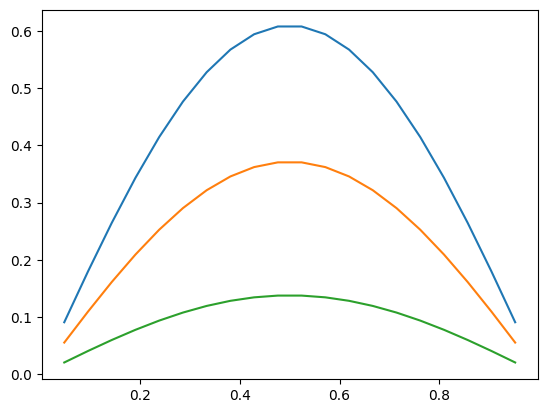

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Kopiert fra over
m=20 
x = np.linspace(0,1,m+2)
h = x[1]-x[0]  
c = 1
L = (1/h**2)*(np.diag((m-1)*[1], -1) + np.diag(m*[-2],0) + np.diag((m-1)*[1],1))
A = (c**2)*L

a = 0
b = 0
F = np.zeros(m)   # erstattes med f = f(x) hvis f(x) er forskjellig fra 0.
F[0] = (c**2) * -a/(h**2)
F[-1] = (c**2) * -b/(h**2)

# Eulers metode, fra matte 1/ProgNumSikk
def euler(f,x0,a,b,N):
    t = np.linspace(a,b,N)
    x = np.zeros((N,x0.size))
    x[0,:] = x0
    for i in np.arange(N-1):
        x[i+1,:] = x[i,:] + (t[i+1]-t[i])*(f(x[i],t[i]))
    return x,t

# funksjonen f(x,t)= Ax - F settes inn i Eulers metode
def f(x,t):
    return A @ x - F

# Initialbetingelsene
# Siden vi har Dirichlet betingelse er ikke randpunktene x[0] og x[-1] med
u0 = np.sin(np.pi*x[1:-1])

# 1000 tidssteg - vi trenger mange for å få en bra resultat, siden vi bruker forlengs Euler
# 0 er initial tid
# 1 er sluttid
u, t = euler(f, u0, 0, 1, 1000)

# plotting
fig, ax = plt.subplots()
ax.plot(x[1:-1],u[50,:]) # 50 tidssteg i blå
ax.plot(x[1:-1],u[100,:]) # 100 tidssteg i oransje
ax.plot(x[1:-1],u[200,:]) # 200 tidssteg i grønn


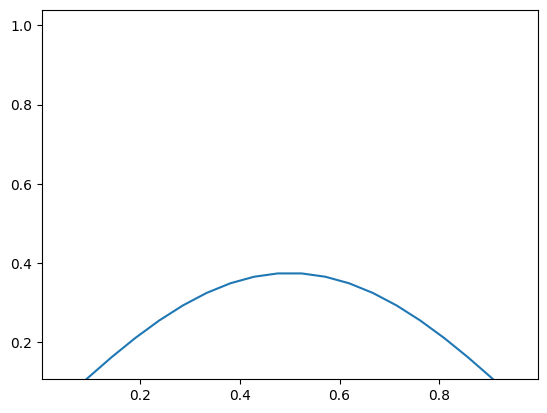

In [ ]:
#
# Koden fortsetter fra ovenfra
#

# Nå ser vi på løsninger med en animasjon
import matplotlib.animation as animation

fig, ax = plt.subplots()

line, = ax.plot(x[1:-1], u[0,:])

def animate(i):
    line.set_ydata(u[i,:])
    return line, 

# vi stopper etter bare en femtedel av tidsteg, da vi har nesten nådd 0 allerede
ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=t.size//5)

from IPython.display import HTML
HTML(ani.to_jshtml())